# Tutorial Notebook #2:

The main purpose of this notebook was to use a completly unseen dataset before and use the tool to pull out interesting and valid subgroups. It was the method through which we evaluated the tool. It also serves as another tutorial on the work flow process with narration on some choices you could make along the way. 

Last Revised 12/15/21
Author: Megan Tabbutt

In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
from Explorer import Explorer

## Load in the Data Frame and take a look at it

In [3]:
time_data = Explorer("./AmericanTimeUsageSurvey_Modified.csv")

In [4]:
df = time_data.getDataFrame()
df.head()

,Year,CaseID,Region,StateCode,MetroUrban,CountyCode,FamilyIncome,HouseHSize,Age,Sex,...,PersonalCare,TelephoneCalls,ProfessionalPersonalCare,ConsumerPurchases,ReligiousActivities,Socializing,SportsExercise,Travelling,Volunteering,Working
0,2003,2.000000e+13,4,6,2,6037,13,3,60,1,...,910,0,0,0,0,325,200,0,0,0
1,2003,2.000000e+13,4,6,4,6000,996,4,41,2,...,680,0,0,0,0,590,0,20,0,0
2,2003,2.000000e+13,4,6,2,6059,14,2,26,2,...,640,60,0,60,0,340,0,10,0,0
3,2003,2.000000e+13,3,13,4,13000,7,4,36,2,...,755,0,0,0,0,265,0,0,0,120
4,2003,2.000000e+13,3,21,4,21000,14,4,51,1,...,460,0,15,0,0,60,60,78,0,500


## Look at the correlations first and see if anything jumps out

### Seems too big to really glean anything, lets see the largest non-trival as well as some above a threshold

In [5]:
correlationMatrix = time_data.getCorrelationMatrix()
correlationMatrix

,Year,CaseID,Region,StateCode,MetroUrban,CountyCode,FamilyIncome,HouseHSize,Age,Sex,...,PersonalCare,TelephoneCalls,ProfessionalPersonalCare,ConsumerPurchases,ReligiousActivities,Socializing,SportsExercise,Travelling,Volunteering,Working
Year,1.000000,0.879782,0.031062,0.003133,-0.042131,0.003190,-0.226229,-0.052508,0.090319,-0.012024,...,0.029139,-0.014955,-0.003237,-0.030389,0.007310,0.030794,-0.002141,-0.025057,-0.002097,-0.012386
CaseID,0.879782,1.000000,0.030174,0.004001,-0.038141,0.004057,-0.165633,-0.042756,0.075326,-0.007979,...,0.025940,-0.009545,-0.004353,-0.025722,0.004825,0.020880,-0.002361,-0.020107,-0.000618,-0.008126
Region,0.031062,0.030174,1.000000,-0.259301,-0.049667,-0.259089,-0.045968,0.027241,-0.030518,-0.001030,...,0.034611,-0.012247,-0.001249,0.000800,0.017700,-0.026556,0.009715,-0.002639,0.004598,-0.001082
StateCode,0.003133,0.004001,-0.259301,1.000000,0.087047,0.999989,-0.000138,-0.005959,0.002693,-0.002648,...,-0.018587,0.002796,-0.002647,-0.003026,0.006717,0.003215,-0.007063,-0.004916,0.005029,0.012153
MetroUrban,-0.042131,-0.038141,-0.049667,0.087047,1.000000,0.086147,0.009202,0.007000,0.048194,0.000879,...,-0.014816,-0.024522,-0.017524,-0.021649,0.010205,0.016076,0.006943,-0.034726,0.011771,-0.010474
CountyCode,0.003190,0.004057,-0.259089,0.999989,0.086147,1.000000,-0.000089,-0.005950,0.002649,-0.002603,...,-0.018561,0.002831,-0.002629,-0.002987,0.006727,0.003196,-0.007074,-0.004899,0.005031,0.012163
FamilyIncome,-0.226229,-0.165633,-0.045968,-0.000138,0.009202,-0.000089,1.000000,-0.013485,0.041584,0.007746,...,-0.001725,0.013318,0.003343,0.001622,0.010710,0.010628,-0.002049,-0.003961,-0.001027,-0.012818
HouseHSize,-0.052508,-0.042756,0.027241,-0.005959,0.007000,-0.005950,-0.013485,1.000000,-0.469488,-0.029127,...,-0.036601,-0.083402,-0.033075,0.021240,-0.011061,-0.214837,0.036513,0.061216,0.007700,0.055825
Age,0.090319,0.075326,-0.030518,0.002693,0.048194,0.002649,0.041584,-0.469488,1.000000,0.043983,...,-0.017650,0.032242,0.050339,-0.012071,0.080708,0.272802,-0.085374,-0.102680,0.037550,-0.166152
Sex,-0.012024,-0.007979,-0.001030,-0.002648,0.000879,-0.002603,0.007746,-0.029127,0.043983,1.000000,...,0.091061,0.101454,0.045055,0.090526,0.051477,-0.074344,-0.102254,-0.034127,0.013089,-0.136540


### A lot of these seem a bit trivial, but socializing and working are negatively correlated, which makes sense but while I didn't just assume a priori

In [6]:
maxcorrelations = time_data.getMaxCorrelation(threshold=.4)
for maxmin in maxcorrelations:
    for corr in maxmin:
        print(corr)

['CaseID', 'Year', 'EducationYears', 'Education']
['Year', 'CaseID', 'Education', 'EducationYears']
[0.8797815582426463, 0.8797815582426463, 0.8875808078720304, 0.8875808078720304]
['Age', 'HouseHSize', 'Working', 'Working', 'LaborForceStatus', 'Socializing']
['HouseHSize', 'Age', 'LaborForceStatus', 'Socializing', 'Working', 'Working']
[-0.469487837373846, -0.469487837373846, -0.5063793917712827, -0.45623249465266524, -0.5063793917712827, -0.45623249465266524]


Pearson's correlation coefficent: r = -0.456232


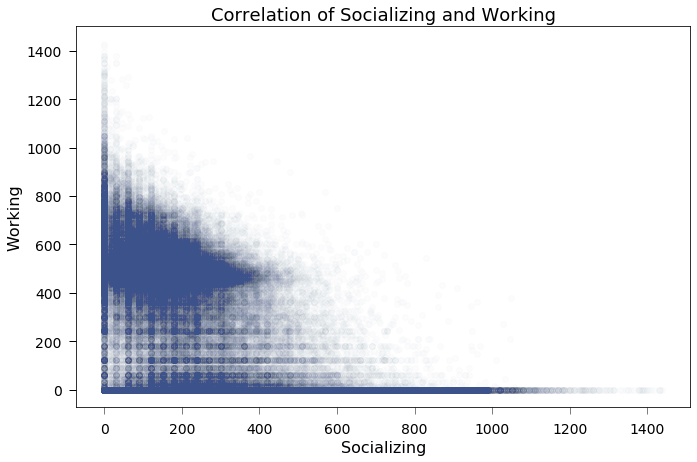

In [7]:
time_data.plotCorrelation("Socializing", "Working", alpha=.01)

## One thing that I notice is the the hours are kind of weird, I think that it is in hours per year, so I want to normalize that to hours per day to work with it more easily. 

In [8]:
for col in df.columns[14:]:
    df[col] = df[col]/365
    
time_data.setDataFrame(df)

,Year,CaseID,Region,StateCode,MetroUrban,CountyCode,FamilyIncome,HouseHSize,Age,Sex,...,PersonalCare,TelephoneCalls,ProfessionalPersonalCare,ConsumerPurchases,ReligiousActivities,Socializing,SportsExercise,Travelling,Volunteering,Working
0,2003,2.000000e+13,4,6,2,6037,13,3,60,1,...,2.493151,0.000000,0.000000,0.000000,0.000000,0.890411,0.547945,0.000000,0.0,0.000000
1,2003,2.000000e+13,4,6,4,6000,996,4,41,2,...,1.863014,0.000000,0.000000,0.000000,0.000000,1.616438,0.000000,0.054795,0.0,0.000000
2,2003,2.000000e+13,4,6,2,6059,14,2,26,2,...,1.753425,0.164384,0.000000,0.164384,0.000000,0.931507,0.000000,0.027397,0.0,0.000000
3,2003,2.000000e+13,3,13,4,13000,7,4,36,2,...,2.068493,0.000000,0.000000,0.000000,0.000000,0.726027,0.000000,0.000000,0.0,0.328767
4,2003,2.000000e+13,3,21,4,21000,14,4,51,1,...,1.260274,0.000000,0.041096,0.000000,0.000000,0.164384,0.164384,0.213699,0.0,1.369863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210581,2019,2.020000e+13,3,45,1,45000,13,2,66,2,...,1.575342,0.027397,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
210582,2019,2.020000e+13,4,32,4,32000,9,3,41,2,...,1.904110,0.000000,0.000000,0.246575,0.000000,1.164384,0.000000,0.273973,0.0,0.000000
210583,2019,2.020000e+13,4,56,3,56000,15,1,75,1,...,1.684932,0.000000,0.000000,0.246575,0.000000,0.547945,0.000000,0.397260,0.0,0.082192
210584,2019,2.020000e+13,4,53,2,53000,14,2,56,2,...,1.616438,0.000000,0.000000,0.027397,0.000000,0.301370,0.000000,0.287671,0.0,1.328767


## That looks a bit better, I can see that there are many people who do not work at all but socialize, that makes sense. 

Pearson's correlation coefficent: r = -0.456232


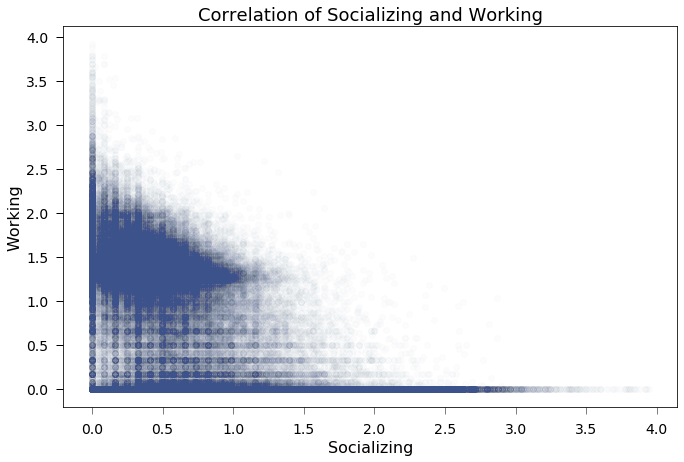

In [9]:
time_data.plotCorrelation("Socializing", "Working", alpha=.01)

## If I lower the threshold what happens:

In [10]:
maxcorrelations = time_data.getMaxCorrelation(threshold=.3)
for maxmin in maxcorrelations:
    for corr in maxmin:
        print(corr)

['CaseID', 'Year', 'CaringHH', 'LaborForceStatus', 'EducationYears', 'Education', 'Age', 'Socializing', 'HouseHSize', 'LaborForceStatus']
['Year', 'CaseID', 'HouseHSize', 'Age', 'Education', 'EducationYears', 'LaborForceStatus', 'LaborForceStatus', 'CaringHH', 'Socializing']
[0.8797815582426463, 0.8797815582426463, 0.34015460503728984, 0.3494917367275195, 0.8875808078720304, 0.8875808078720304, 0.3494917367275195, 0.35557203444396746, 0.34015460503728984, 0.35557203444396746]
['Age', 'HouseHSize', 'Working', 'Working', 'Working', 'Working', 'LaborForceStatus', 'HHActivities', 'PersonalCare', 'Socializing']
['HouseHSize', 'Age', 'LaborForceStatus', 'HHActivities', 'PersonalCare', 'Socializing', 'Working', 'Working', 'Working', 'Working']
[-0.469487837373846, -0.469487837373846, -0.5063793917712827, -0.30997375746788386, -0.3305867513097637, -0.45623249465266524, -0.5063793917712827, -0.30997375746788386, -0.3305867513097637, -0.45623249465266524]


### Some interesting pairs:

- CaringHH and HouseHSize
- Socializing and LaborForceStatus
- Age and LaborForceStatus

## Based on these matches, lets make a subset of our data to look at and focus in on:

In [11]:
time_data_sub = Explorer("./AmericanTimeUsageSurvey_Modified_Subset.csv")
df_sub = time_data_sub.getDataFrame()

for col in df_sub.columns[7:]:
    df_sub[col] = df_sub[col]/365
    
time_data.setDataFrame(df_sub)

df_sub.head()

,Year,Region,FamilyIncome,HouseHSize,Age,Sex,LaborForceStatus,CaringHH,CaringNonHH,Educational,HHActivities,HHServices,PersonalCare,Socializing,SportsExercise,Volunteering,Working
0,2003,4,13,3,60,1,2,0.000000,0.0,0.0,0.000000,0.0,2.493151,0.890411,0.547945,0.0,0.000000
1,2003,4,996,4,41,2,1,0.164384,0.0,0.0,0.000000,0.0,1.863014,1.616438,0.000000,0.0,0.000000
2,2003,4,14,2,26,2,2,0.000000,0.0,0.0,0.698630,0.0,1.753425,0.931507,0.000000,0.0,0.000000
3,2003,3,7,4,36,2,4,0.013699,0.0,0.0,0.739726,0.0,2.068493,0.726027,0.000000,0.0,0.328767
4,2003,3,14,4,51,1,1,0.328767,0.0,0.0,0.150685,0.0,1.260274,0.164384,0.164384,0.0,1.369863


## Lets check out some summary statistics and clusters

In [12]:
summaryMatrix = time_data_sub.getSummaryMatrix()
summaryMatrix

,counts,range,mean,variance,skew
Year,210586,16.000000,2010.225219,24.192589,0.144212
Region,210586,3.000000,2.625545,1.016707,-0.218886
FamilyIncome,210586,997.000000,74.685886,59079.658067,3.525887
HouseHSize,210586,15.000000,2.761409,2.348307,0.867946
Age,210586,70.000000,47.519674,317.794852,0.159913
Sex,210586,1.000000,1.560237,0.246373,-0.242714
LaborForceStatus,210586,4.000000,2.493613,3.521523,0.516440
CaringHH,210586,3.369863,0.089903,0.049269,3.732660
CaringNonHH,210586,3.424658,0.025873,0.016824,8.263338
Educational,210586,3.528767,0.042776,0.046508,6.017456


### For the clusters to work well, I think it's important to normalize the data

In [13]:
clusters = time_data_sub.printClusters(clusterdata="summary", ncomponents=10, reg_covar=.0001)

['LaborForceStatus']

['FamilyIncome']

['Year']

['Age']

['CaringNonHH', 'Volunteering']

['HHServices']

['HouseHSize']

['HHActivities', 'PersonalCare', 'Socializing', 'Working']

['Region', 'Sex']

['CaringHH', 'Educational', 'SportsExercise']



## Nothing pops out at me as being super interesting in those clusters, lets keep digging:

### How about one that I think might be (inversely) correlated, Exercise and working:

Correlation: (-0.09234782988761367, 0.0)
Pearson's correlation coefficent: r = -0.092348


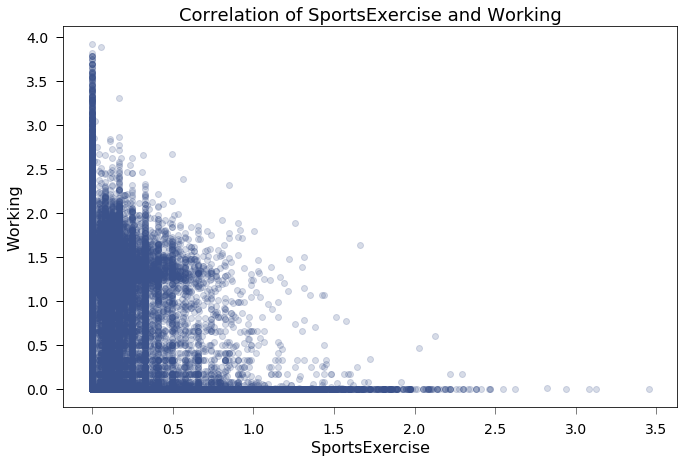

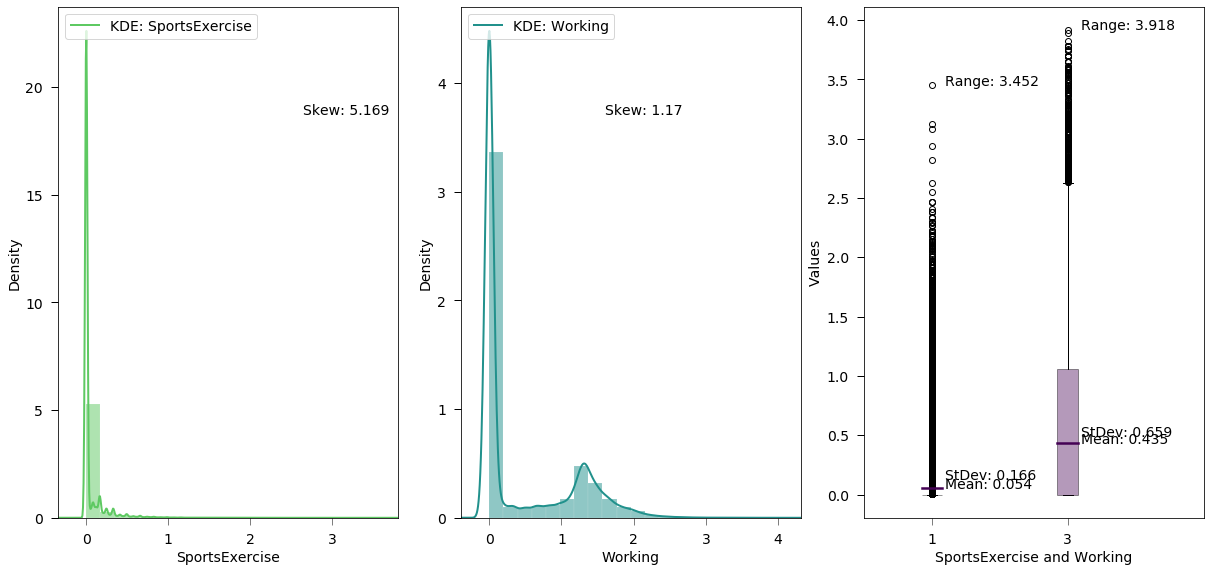

In [14]:
print("Correlation:", time_data_sub.getCorrelation("SportsExercise", "Working"))

time_data_sub.plotCorrelation("SportsExercise", "Working", alpha=.2)

time_data_sub.plotSummaryStatsComparison("SportsExercise", "Working", printStats=False)

### There is a negative correlation, although it isn't very large... I am surprised at the peak at ~1.5 hours though in the working histogram. That makes me question the data and how we normalized it. Maybe it wasn't total hours for the year... but only a month? Since I would've expected that to be closer to 5/7(40)

## Lets look at the subgroups now and think about some interesting comparisons we could make:

In [15]:
cols = ['Region', 'Sex', 'LaborForceStatus']
subgroupMatrix = time_data_sub.getSubGroupsMatrix(df, cols, "Age")
subgroupMatrix

,Region_1,Region_2,Region_3,Region_4,Sex_1,Sex_2,LaborForceStatus_1,LaborForceStatus_2,LaborForceStatus_3,LaborForceStatus_4,LaborForceStatus_5
counts,36662,51257,76941,45726,92608,117978,125050,5675,1008,8569,70284
range,70,70,70,70,70,70,70,70,65,70,70
mean,48.44034695324859,47.328735587334414,47.95937146644832,46.25567510825351,46.634685988251555,48.214353523538286,42.92838864454218,44.24052863436123,43.13988095238095,35.748512078422216,57.45125490865631
variance,317.1623534215312,318.22238967834824,319.1681959345479,312.8891394709548,302.62187590212983,328.6103241627032,180.702154517924,201.06779668912532,214.8731646332813,258.0255653045051,425.7349572345667
skew,0.12979189506698066,0.19750531466871687,0.11114208586371303,0.22453198175073938,0.14206071966243464,0.16385989134704784,0.19171456322272615,0.1198402936820481,0.14283341452769316,0.4730280104088809,-0.6758638552108279


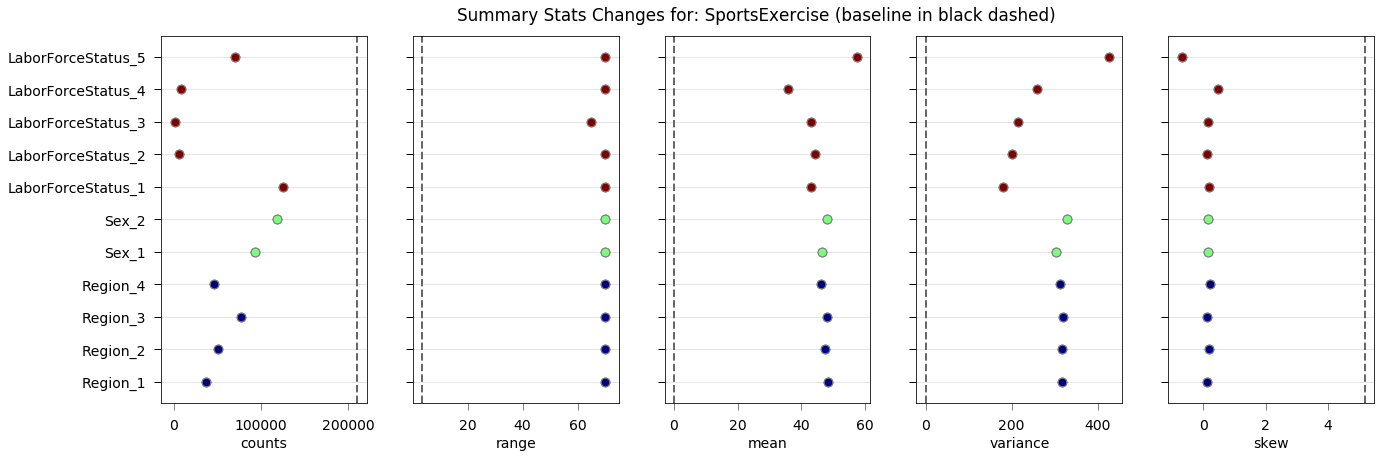

In [16]:
time_data_sub.plotSubGroupMatrix("SportsExercise", cols, subgroupMatrix.columns, style="overview")

## So this makes sense with the correlations and the subgroups. In the first subgroup you have people who are employed, and there is a small negative correlation of exercise and age. But with the people who are not in the labor force, there is a larger negative correlation to exercise and age. You can see that it is a bit bimodel though where older people and younger people are doing more exercise which also makes sense. 

((-0.0531882126640454, 5.008495541378183e-79),
 (-0.1307564249023212, 1.496428414007398e-265))

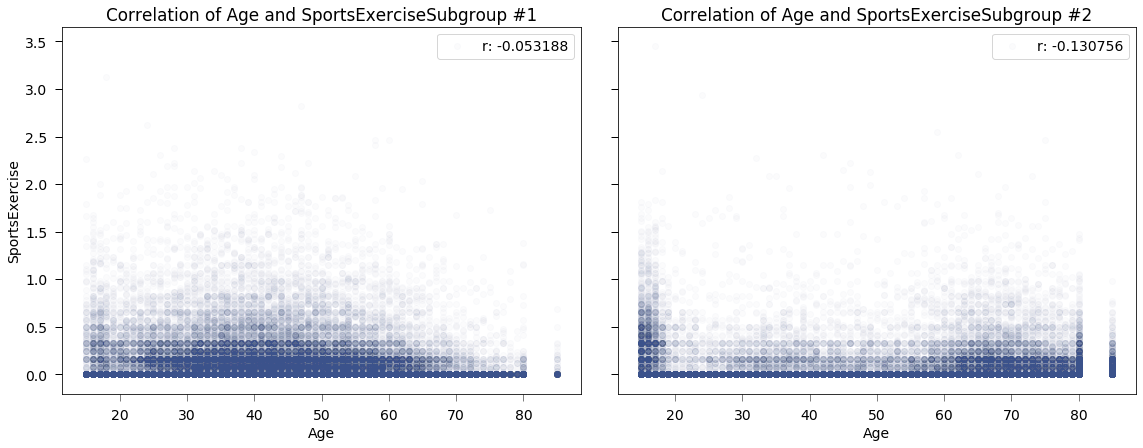

In [17]:
df1 = df[df['LaborForceStatus'] == 1.0]
df2 = df[df['LaborForceStatus'] == 5.0]


time_data.getSubgroupCorrelation(df1, df2, "Age", "SportsExercise", plotting=True, alpha=.02)

## Let's make some more interesting plots now about some of these ideas:

## As you would expect most of the people "not in labor force" are under the working age, or retirement age. As I would expect the weight of the females is higher than males on average. Both seem to have peaks during the parenting age which makes sense

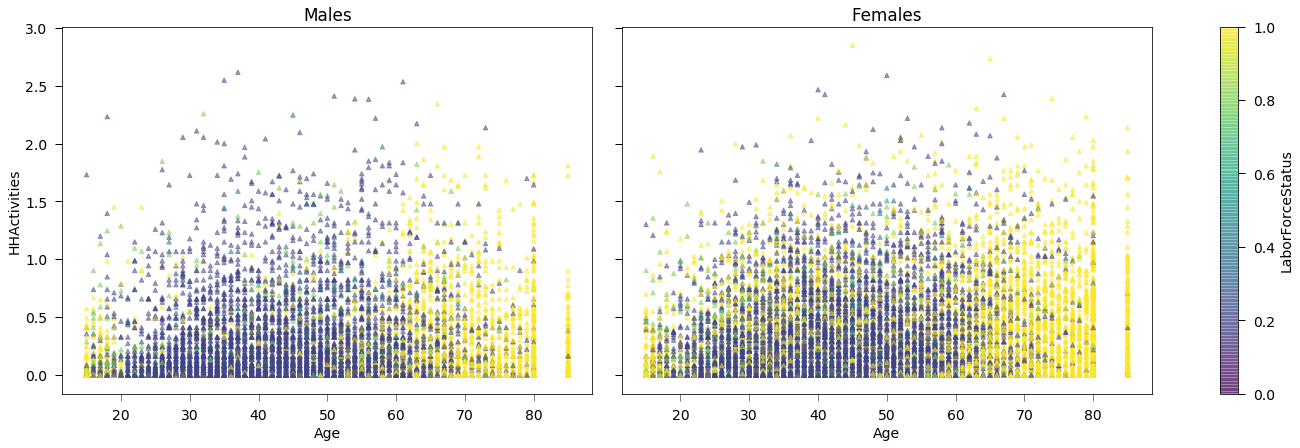

In [18]:
df1 = df[df['Sex'] == 1.0]
df2 = df[df['Sex'] == 2.0]

time_data.getSpecialPlot1("Age", "HHActivities", "LaborForceStatus", df1, df2, maxpts=8000, titleOn=True, titles=["Males", "Females"])

## This is pretty cool! You can see that the males have a higher scatter to higher values than females, which you might sadly assume a priori. I don't see a clear thrend with labor status, most of the male outliers appear to be unemployed, same with female. 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


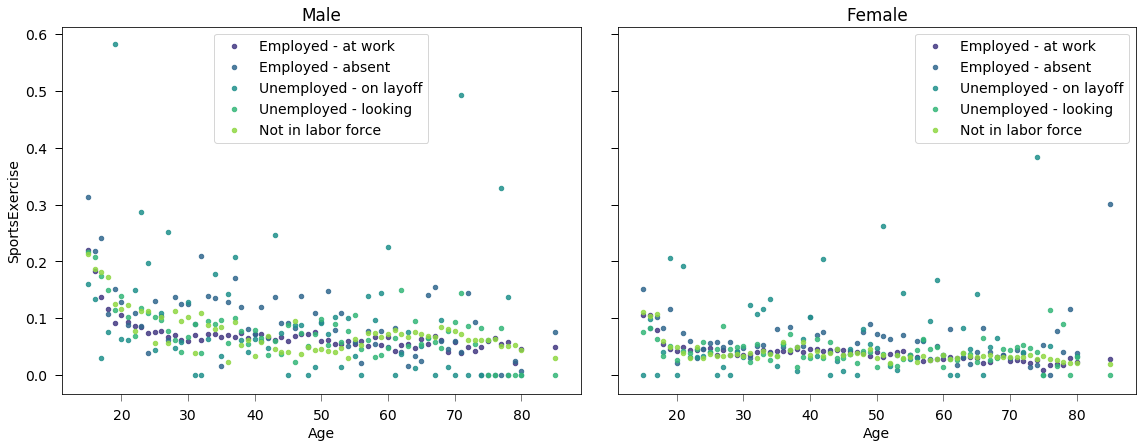

In [19]:
df1 = df[df['Sex'] == 1.0]
df2 = df[df['Sex'] == 2.0]

time_data.getSpecialPlot2("Age", "SportsExercise", "LaborForceStatus", df1, df2, 
                          labels=["Employed - at work", "Employed - absent", "Unemployed - on layoff", "Unemployed - looking", "Not in labor force"], 
                            titleOn=True, titles=["Male", "Female"])